In [1]:
!pip install image==1.5.20.

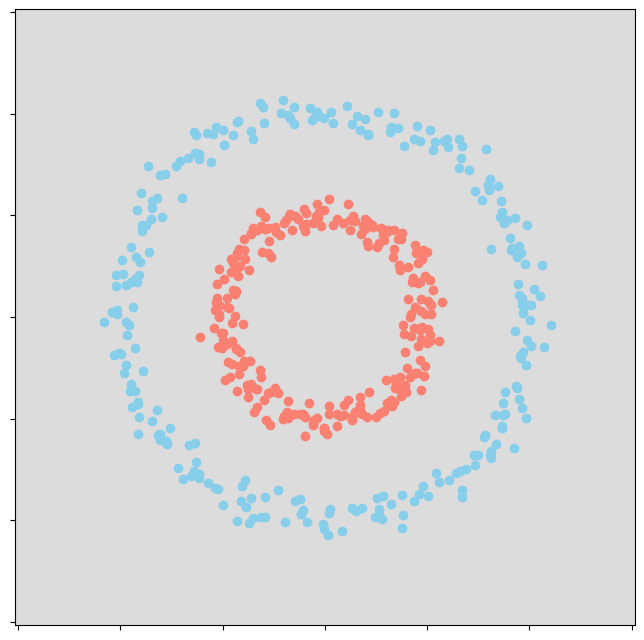

In [2]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concentricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
# Resolucion del mapa de prediccion.
res =100
# coordendadas del mapa de prediccion.
_x0= np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
# Input con cada combo de coordenadas del mapa de predicción.

_px = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

#Objeto vacio a 0.5 del mapa de predicción.
_py = np.zeros((res, res)) + 0.5

#Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh( _x0, _x1, _py, cmap='coolwarm', vmin=0, vmax=1)

# Visualizacion de la nube de datos.
plt.scatter(X[Y== 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display,HTML

Instructions for updating:
non-resource variables are not supported in the long term


Step: 0 / 1000  - Loss: 0.3512152 - Acc =  0.522
Step: 25 / 1000  - Loss: 0.33562645 - Acc =  0.58
Step: 50 / 1000  - Loss: 0.326339 - Acc =  0.608
Step: 75 / 1000  - Loss: 0.317002 - Acc =  0.622
Step: 100 / 1000  - Loss: 0.3039286 - Acc =  0.63
Step: 125 / 1000  - Loss: 0.25367156 - Acc =  0.552
Step: 150 / 1000  - Loss: 0.17290995 - Acc =  0.808
Step: 175 / 1000  - Loss: 0.14747497 - Acc =  0.914
Step: 200 / 1000  - Loss: 0.12880126 - Acc =  0.968
Step: 225 / 1000  - Loss: 0.11247337 - Acc =  0.98
Step: 250 / 1000  - Loss: 0.09923164 - Acc =  0.986
Step: 275 / 1000  - Loss: 0.08816784 - Acc =  0.992
Step: 300 / 1000  - Loss: 0.07856406 - Acc =  0.992
Step: 325 / 1000  - Loss: 0.0700939 - Acc =  0.996
Step: 350 / 1000  - Loss: 0.062073562 - Acc =  0.996
Step: 375 / 1000  - Loss: 0.054825258 - Acc =  1.0
Step: 400 / 1000  - Loss: 0.04854577 - Acc =  1.0
Step: 425 / 1000  - Loss: 0.04312251 - Acc =  1.0
Step: 450 / 1000  - Loss: 0.03844603 - Acc =  1.0
Step: 475 / 1000  - Loss: 0.03448

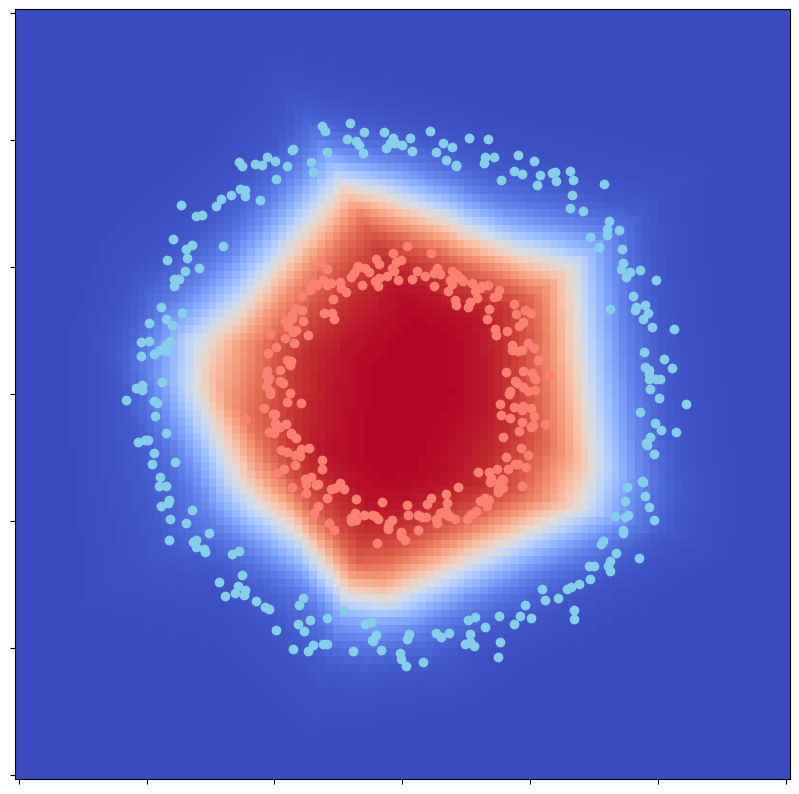

In [4]:
from os import name
#Definimos los puntos de entrada de la red, para la matriz X e Y.
iX=tf.placeholder('float',shape=[None,X.shape[1]])
iY=tf.placeholder('float',shape=[None])

lr=0.01  #learning rate
nn=[2,16,8,1] #numero de neuronas en cada capa

#Capa 1
W1=tf.Variable(tf.random_normal([nn[0],nn[1]]), name='Weights_1')
b1=tf.Variable(tf.random_normal([nn[1]]),name='Bias_1')
l1=tf.nn.relu(tf.add(tf.matmul(iX,W1),b1))
#Capa 2
W2=tf.Variable(tf.random_normal([nn[1],nn[2]]), name='Weights_2')
b2=tf.Variable(tf.random_normal([nn[2]]),name='Bias_2')
l2=tf.nn.relu(tf.add(tf.matmul(l1,W2),b2))
#Capa 3
W3=tf.Variable(tf.random_normal([nn[2],nn[3]]), name='Weights_3')
b3=tf.Variable(tf.random_normal([nn[3]]),name='Bias_3')
#Vector de predicciones de Y.
pY=tf.nn.sigmoid(tf.add(tf.matmul(l2,W3),b3))[:,0]

#Evaluación de las predicciones.
loss=tf.losses.mean_squared_error(pY,iY)

#Definimos al optimizador de la red, para que minimice el error.
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps=1000 #Número de ciclos de entrenamiento.
iPy=[] #Aquí guardamos la evolución de las predicción, para la animación

with tf.Session() as sess:
  #Inicializamos todos los parámetros de la red, las matrices Wy b.
  sess.run(tf.global_variables_initializer())
  #Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    #Evaluamos al optimizador, a la función de coste y al tensor de salida pY.
    #La evaluación del optimizer producirá el entrenamiento de la red.
    _,_loss,_pY=sess.run([optimizer,loss,pY],feed_dict={iX:X,iY:Y})
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:
      #Cálculo del accuracy.
      acc=np.mean(np.round(_pY)==Y)
      #impresión de métricas.
      print('Step:',step,'/',n_steps,' - Loss:',_loss,'- Acc = ', acc)
      #Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY=sess.run(pY,feed_dict={iX:_px}).reshape((res,res))
      #Y lo guardamos para visualizar la animación.
      iPy.append(_pY)

# --- CÓDIGO ANIMACIÓN ----#
ims=[]
fig=plt.figure(figsize=(10,10))
print("--- Generando animación ---")

for fr in range(len(iPy)):
  im=plt.pcolormesh( _x0, _x1, iPy[fr], cmap='coolwarm', animated=True)
  #Visualización de la nube de datos.
  plt.scatter(X[Y== 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  #plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani=animation.ArtistAnimation(fig,ims,interval=50,blit=True,repeat_delay=1000)
HTML(ani.to_html5_video())


#Keras

In [20]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD

from IPython.core.display import display,HTML

# Habilitar el modo de depuración para tf.data


lr=0.01  #learning rate
nn=[2,16,8,1] #numero de neuronas en cada capa.

#Creamos el objeto que contendrá a nuestra red neuronal,como
#Secuencia de capas.
model=kr.Sequential()


#Capa 1
l1=model.add(kr.layers.Dense(nn[1],activation='relu'))

#Capa 2
l2=model.add(kr.layers.Dense(nn[2],activation='relu'))

#Capa 3
l3=model.add(kr.layers.Dense(nn[3],activation='sigmoid'))

#model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['acc'])



#Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse',optimizer=kr.optimizers.SGD(learning_rate=0.05),metrics=['acc'])
#Y entrenamos al modelo. Los callbacks
model.fit(X,Y,epochs=1000)

Epoch 1/1000


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [15]:
import tensorflow as tf

# Create a simple dataset
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5])

# Iterate over the dataset in eager mode
for element in dataset:
    print(element.numpy())  # .numpy() converts the tensor to a NumPy array

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [18]:
import tensorflow as tf

@tf.function
def process_dataset(dataset):
    def print_element(state, element):
        tf.print(element)
        return state

    dataset.reduce(initial_state=tf.constant(0), reduce_func=print_element)

# Create a simple dataset
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5])

process_dataset(dataset)

NotImplementedError: numpy() is only available when eager execution is enabled.

In [31]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# Asegurar que la ejecución ansiosa esté habilitada
tf.config.run_functions_eagerly(True)

# Crear datos artificiales de anillos concéntricos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Definimos el modelo secuencial
model = tf.keras.Sequential()

# Añadimos las capas
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))  # Capa 1
model.add(layers.Dense(8, activation='relu'))                      # Capa 2
model.add(layers.Dense(1, activation='sigmoid'))                   # Capa 3

# Compilamos el modelo
model.compile(loss='mse', optimizer=SGD(learning_rate=0.05), metrics=['acc'])

# Definir un callback personalizado
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch}: loss = {logs['loss']}, acc = {logs['acc']}")

# Entrenar el modelo con callbacks
model.fit(X, Y, epochs=10, callbacks=[CustomCallback()])

# Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_px = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Predicción para cada punto del mapa de predicción
_pred = model.predict(_px).reshape(res, res)

# Visualización del mapa de predicción
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pred, cmap='coolwarm', vmin=0, vmax=1)

# Visualización de la nube de datos
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.